## [예] 경기도에서 교통사망사고가 많은 5지역을 분석하여 도식화

(1) 발생지시도가 경기도 데이타셋 필터링

(2) 경기도내에서도 발생지시군구의 그룹핑

(3) 사망자수의 합계로 차트 만들기


In [80]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)


In [88]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')
#data.columns
# (1) 발생지시도가 경기도인 필터링

gyeonggi=data[data['발생지시도'] =='경기']
gyeonggi.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262


In [48]:
# (2) 경기도내에서도 발생지시군구의 그룹핑
sigungu = gyeonggi.groupby('발생지시군구')


Text(0, 0.5, '사망자수')

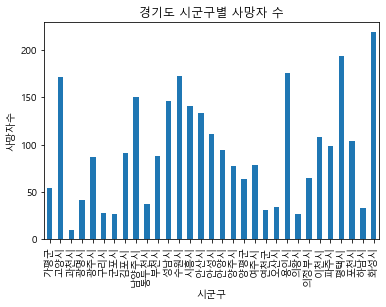

In [83]:
# (3) 사망자수의 합계로 차트 만들기
death = sigungu.sum()

a = death['사망자수'].plot(kind='bar')
a.set_title("경기도 시군구별 사망자 수")
a.set_xlabel("시군구")
a.set_ylabel("사망자수")




Text(0, 0.5, '사망자수')

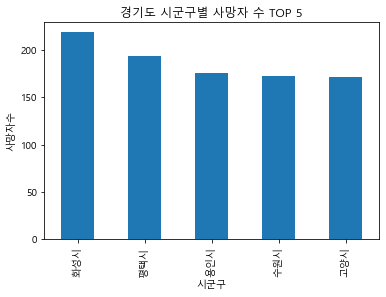

In [87]:
# (4) 경기도 내에서 사망자 순 5개 지역 추출
death_sort = death.sort_values("사망자수",ascending = 0)
top5 = death_sort.head()

a=top5['사망자수'].plot(kind = 'bar')

a.set_title("경기도 시군구별 사망자 수 TOP 5")
a.set_xlabel("시군구")
a.set_ylabel("사망자수")